In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn') #for data visualisation
%matplotlib inline

In [2]:
#loading the datasets
confirmed_cases = pd.read_csv('Dataset/time_series_covid-19_confirmed.csv')

In [3]:
deaths_reported = pd.read_csv('Dataset/time_series_covid-19_deaths.csv')

In [4]:
recovered_cases = pd.read_csv('Dataset/time_series_covid-19_recovered.csv')

In [5]:
#displaying the head of the data, this will show the top 5 rows of each dataset.
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,420,461,502,511,581,639,639,701,773,839
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,83,93,99,117,129,149,149,197,238,428


In [6]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,10,10,15,16,19,22,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,31,31,33,34,34,35,35,35
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,46,76,76,76,101,118,118,118,118,118
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,78,78,96,96,97,105,105
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,22,23,24,24,24,26,26,26,35,42


In [8]:
#using the .keys function all of the confirmed_cases column names will be extracted.
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20'],
      dtype='object')

In [9]:
# as shown above all of the columns can now be displayed

In [10]:
#extracting the date columns that provide information of the confirmed, deaths and recovered cases
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]

In [11]:
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]

In [12]:
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [13]:
#Now only the date columns and the values of each of the dates
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,2,3,5,7,8,8,14,14,14,19,...,48,50,50,50,53,59,70,75,82,114
1,2,1,2,2,4,4,7,7,11,15,...,420,461,502,511,581,639,639,701,773,839
2,0,1,3,3,4,5,7,7,10,13,...,130,138,150,150,160,178,178,200,212,226
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,3,4,4,4,7,8,8,...,83,93,99,117,129,149,149,197,238,428


In [14]:
#obtaining the total confirmed, deaths and recovered cases then appending them into 4 empty lists
# additionally calculating the total mortality rate which is the death_sum/confirmed cases.

#4 lists
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

#to obtain the data fot the empty lists this for loop takes the date variables into consideration and for each value suming the total confirmed, 
#deaths and recovered cases then appends the values to the empty lists that have been created.
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [15]:
confirmed_sum

167449

In [16]:
death_sum

6440

In [17]:
recovered_sum

76034

In [18]:
world_cases

[555,
 653,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30817,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76823,
 78579,
 78965,
 79568,
 80413,
 81395,
 82754,
 84120,
 86011,
 88369,
 90306,
 92840,
 95120,
 97882,
 101784,
 105821,
 109795,
 113561,
 118592,
 125865,
 128343,
 145193,
 156097,
 167449]

In [19]:
#converting all of the data we have accumaulated so far into a form of a numpy array using the np.array function
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [20]:
#displaying all of the newly created arrays 
days_since_1_22

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53]])

In [21]:
world_cases

array([[   555],
       [   653],
       [   941],
       [  1434],
       [  2118],
       [  2927],
       [  5578],
       [  6166],
       [  8234],
       [  9927],
       [ 12038],
       [ 16787],
       [ 19881],
       [ 23892],
       [ 27635],
       [ 30817],
       [ 34391],
       [ 37120],
       [ 40150],
       [ 42762],
       [ 44802],
       [ 45221],
       [ 60368],
       [ 66885],
       [ 69030],
       [ 71224],
       [ 73258],
       [ 75136],
       [ 75639],
       [ 76197],
       [ 76823],
       [ 78579],
       [ 78965],
       [ 79568],
       [ 80413],
       [ 81395],
       [ 82754],
       [ 84120],
       [ 86011],
       [ 88369],
       [ 90306],
       [ 92840],
       [ 95120],
       [ 97882],
       [101784],
       [105821],
       [109795],
       [113561],
       [118592],
       [125865],
       [128343],
       [145193],
       [156097],
       [167449]], dtype=int64)

In [22]:
total_deaths

array([[  17],
       [  18],
       [  26],
       [  42],
       [  56],
       [  82],
       [ 131],
       [ 133],
       [ 171],
       [ 213],
       [ 259],
       [ 362],
       [ 426],
       [ 492],
       [ 564],
       [ 634],
       [ 719],
       [ 806],
       [ 906],
       [1013],
       [1113],
       [1118],
       [1371],
       [1523],
       [1666],
       [1770],
       [1868],
       [2007],
       [2122],
       [2247],
       [2251],
       [2458],
       [2469],
       [2629],
       [2708],
       [2770],
       [2814],
       [2872],
       [2941],
       [2996],
       [3085],
       [3160],
       [3254],
       [3348],
       [3460],
       [3558],
       [3802],
       [3988],
       [4262],
       [4615],
       [4720],
       [5404],
       [5819],
       [6440]], dtype=int64)

In [23]:
total_recovered

array([[   28],
       [   30],
       [   36],
       [   39],
       [   52],
       [   61],
       [  107],
       [  126],
       [  143],
       [  222],
       [  284],
       [  472],
       [  623],
       [  852],
       [ 1124],
       [ 1487],
       [ 2011],
       [ 2616],
       [ 3244],
       [ 3946],
       [ 4683],
       [ 5150],
       [ 6295],
       [ 8058],
       [ 9395],
       [10865],
       [12583],
       [14352],
       [16121],
       [18177],
       [18890],
       [22886],
       [23394],
       [25227],
       [27905],
       [30384],
       [33277],
       [36711],
       [39782],
       [42716],
       [45602],
       [48228],
       [51170],
       [53796],
       [55865],
       [58358],
       [60694],
       [62494],
       [64404],
       [67003],
       [68324],
       [70251],
       [72624],
       [76034]], dtype=int64)

In [24]:
# Predicting the next 10 days
days_in_prediction = 10
prediction_forecast = np.array([i for i in range (len(dates)+days_in_prediction)]).reshape(-1,1)
adjusted_dates = prediction_forecast[:-10]

In [25]:
prediction_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63]])

In [26]:
# for better visualization all of the integers will be converted into datetime

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
prediction_forecast_dates=[]
for i in range(len(prediction_forecast)):
    prediction_forecast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [27]:
# Visualization with the latest data of March 15th
latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [28]:
latest_confirmed

0      114
1      839
2      226
3        1
4      428
      ... 
445      1
446      1
447      1
448      1
449      1
Name: 3/15/20, Length: 450, dtype: int64

In [29]:
latest_deaths

0       1
1      22
2       0
3       0
4       0
       ..
445     0
446     0
447     0
448     0
449     0
Name: 3/15/20, Length: 450, dtype: int64

In [30]:
latest_recoveries

0       35
1      118
2      105
3        1
4       42
      ... 
445      0
446      0
447      0
448      0
449      0
Name: 3/15/20, Length: 450, dtype: int64

In [31]:
#All the Unique Countries across the globe
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Thailand',
 'Japan',
 'Singapore',
 'Nepal',
 'Malaysia',
 'Canada',
 'Australia',
 'Cambodia',
 'Sri Lanka',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'Italy',
 'Sweden',
 'Spain',
 'Belgium',
 'Egypt',
 'Lebanon',
 'Iraq',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Austria',
 'Israel',
 'Pakistan',
 'Brazil',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'Netherlands',
 'San Marino',
 'Belarus',
 'Iceland',
 'Lithuania',
 'Mexico',
 'New Zealand',
 'Nigeria',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Hungary',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Bosnia and Herzegovina',
 'Slovenia',
 'South Africa',
 'Bhutan',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Peru',

In [32]:
#calculating number of cases per country
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
            
for i in no_cases:
    unique_countries.remove(i)

unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [33]:
#number of cases per country/region
print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
China: 81003 cases
Italy: 24747 cases
Iran: 13938 cases
Korea, South: 8162 cases
Spain: 7798 cases
Germany: 5795 cases
France: 4513 cases
US: 3499 cases
Switzerland: 2200 cases
Norway: 1221 cases
United Kingdom: 1144 cases
Netherlands: 1135 cases
Sweden: 1022 cases
Belgium: 886 cases
Denmark: 875 cases
Austria: 860 cases
Japan: 839 cases
Cruise Ship: 696 cases
Malaysia: 428 cases
Qatar: 401 cases
Greece: 331 cases
Australia: 297 cases
Czechia: 253 cases
Canada: 252 cases
Israel: 251 cases
Portugal: 245 cases
Finland: 244 cases
Singapore: 226 cases
Slovenia: 219 cases
Bahrain: 214 cases
Estonia: 171 cases
Iceland: 171 cases
Brazil: 162 cases
Philippines: 140 cases
Romania: 131 cases
Ireland: 129 cases
Poland: 119 cases
Indonesia: 117 cases
Iraq: 116 cases
Thailand: 114 cases
India: 113 cases
Kuwait: 112 cases
Egypt: 110 cases
Lebanon: 110 cases
Saudi Arabia: 103 cases
San Marino: 101 cases
United Arab Emirates: 98 cases
Chile: 74 cases
Russia: 63 ca

In [34]:
#find the list of unique provinces
unique_provinces = list(confirmed_cases['Province/State'].unique())
#those are countries which are not provinces/states.
outliers = ['United Kingdom', 'Denmark', 'France']
for i in outliers:
    unique_provinces.remove(i)

In [35]:
#number of confirmed cases per province
province_confirmed_cases = []
no_cases = []
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)       

for i in no_cases:
    unique_provinces.remove(i)
    

In [36]:
#number of cases per Province, state or city

for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}: {province_confirmed_cases[i]} cases')

British Columbia: 73 cases
New South Wales: 134 cases
Victoria: 57 cases
Queensland: 61 cases
South Australia: 20 cases
Western Australia: 17 cases
Tasmania: 6 cases
Northern Territory: 1 cases
Ontario: 104 cases
Alberta: 39 cases
Quebec: 24 cases
Washington: 643 cases
New York: 732 cases
California: 426 cases
Massachusetts: 164 cases
Diamond Princess: 742 cases
Grand Princess: 23 cases
Georgia: 99 cases
Colorado: 131 cases
Florida: 115 cases
New Jersey: 98 cases
Oregon: 36 cases
Texas: 72 cases
Illinois: 93 cases
Pennsylvania: 66 cases
Iowa: 18 cases
Maryland: 32 cases
North Carolina: 33 cases
South Carolina: 28 cases
Tennessee: 39 cases
Virginia: 45 cases
Arizona: 13 cases
Indiana: 20 cases
Kentucky: 20 cases
District of Columbia: 16 cases
Nevada: 24 cases
New Hampshire: 13 cases
Minnesota: 35 cases
Nebraska: 17 cases
Ohio: 37 cases
Rhode Island: 20 cases
Wisconsin: 32 cases
Connecticut: 24 cases
Hawaii: 6 cases
Oklahoma: 7 cases
Utah: 28 cases
Kansas: 8 cases
Louisiana: 91 cases
Mis

In [37]:
#handling missing values/nan if there are any

nan_indices=[]

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)


<function matplotlib.pyplot.show(*args, **kw)>

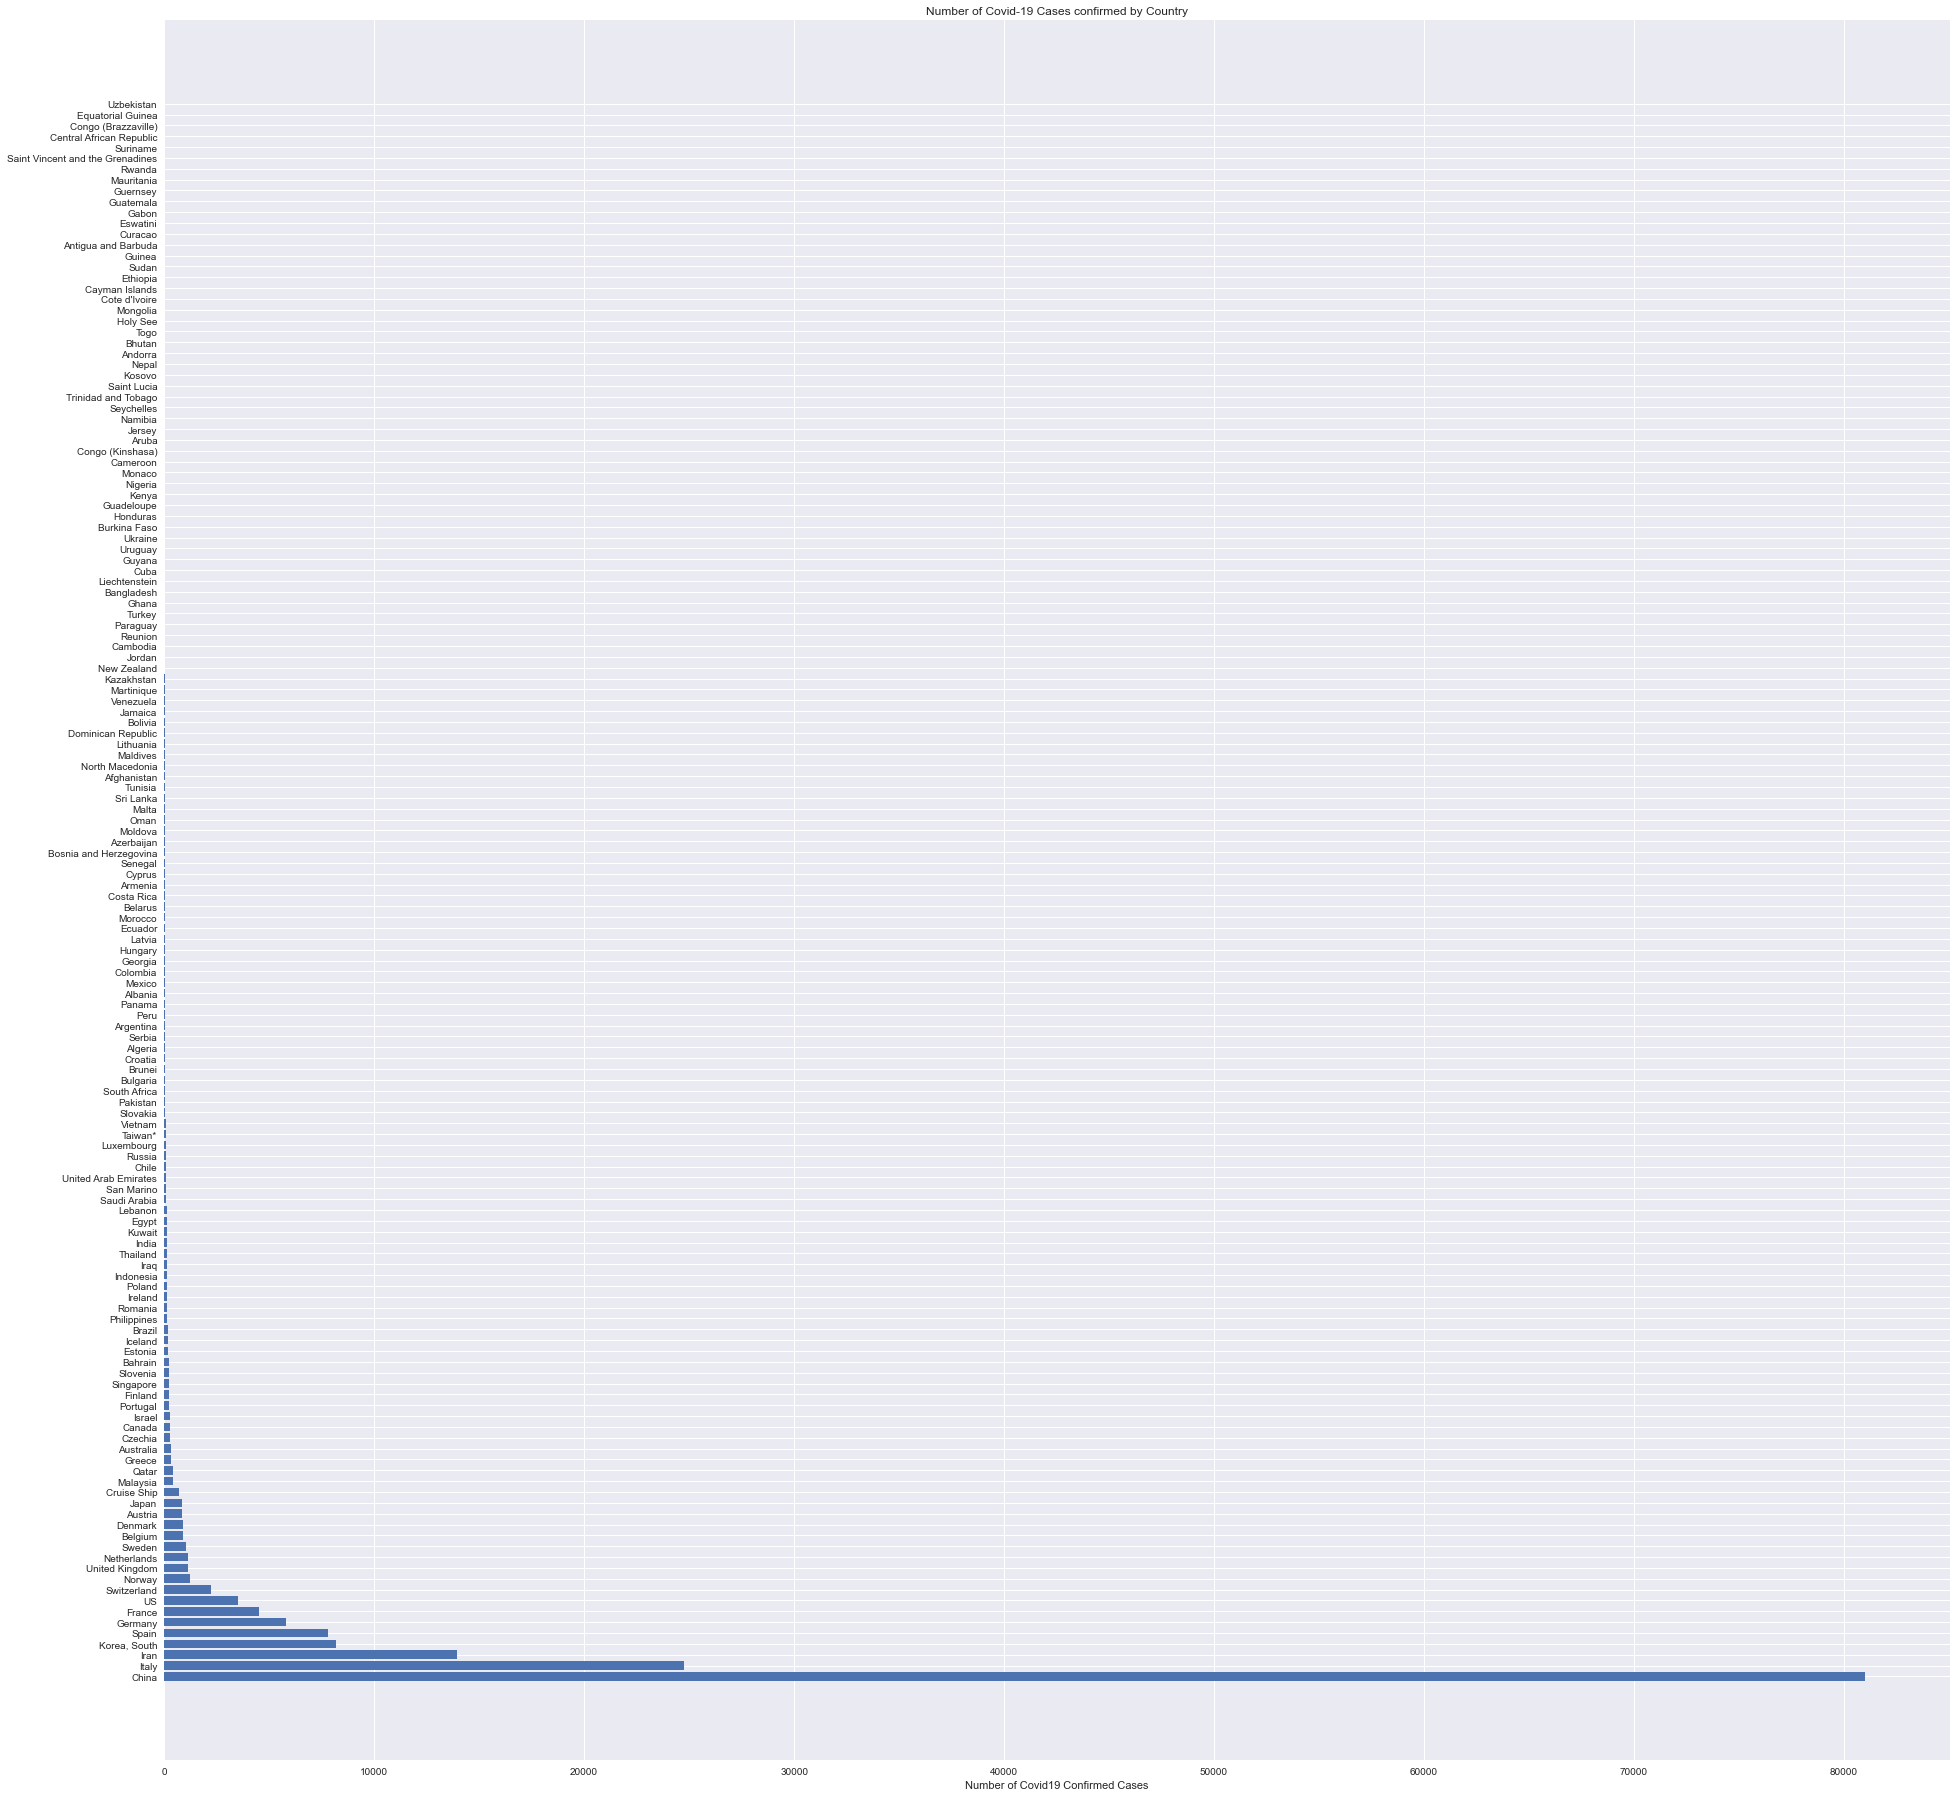

In [38]:
#plot a bar graph to see the total confirmed cases across different countries

plt.figure(figsize=(32,32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Cases confirmed by Country')
plt.xlabel('Number of Covid19 Confirmed Cases')
plt.show

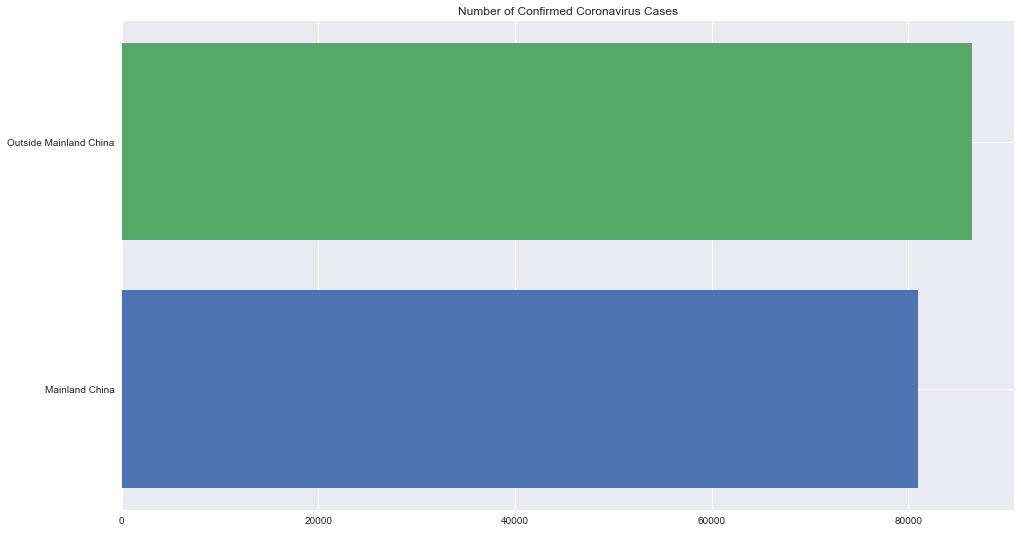

In [39]:
#china v world total cases graph
china_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16,9))
plt.barh('Mainland China' , china_confirmed)
plt.barh('Outside Mainland China' ,outside_mainland_china_confirmed)
plt.title('Number of Confirmed Coronavirus Cases')
plt.show()

In [40]:
#total cases in china and outside
print('Outside Mainland China {} cases: ' .format(outside_mainland_china_confirmed))
print('Mainland China: {} cases'.format(china_confirmed))
print('Total: {} cases'.format(china_confirmed+outside_mainland_china_confirmed))

Outside Mainland China 86446 cases: 
Mainland China: 81003 cases
Total: 167449 cases


In [41]:
#top 10 countries with confirmed casses and grouping the rest as others
visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

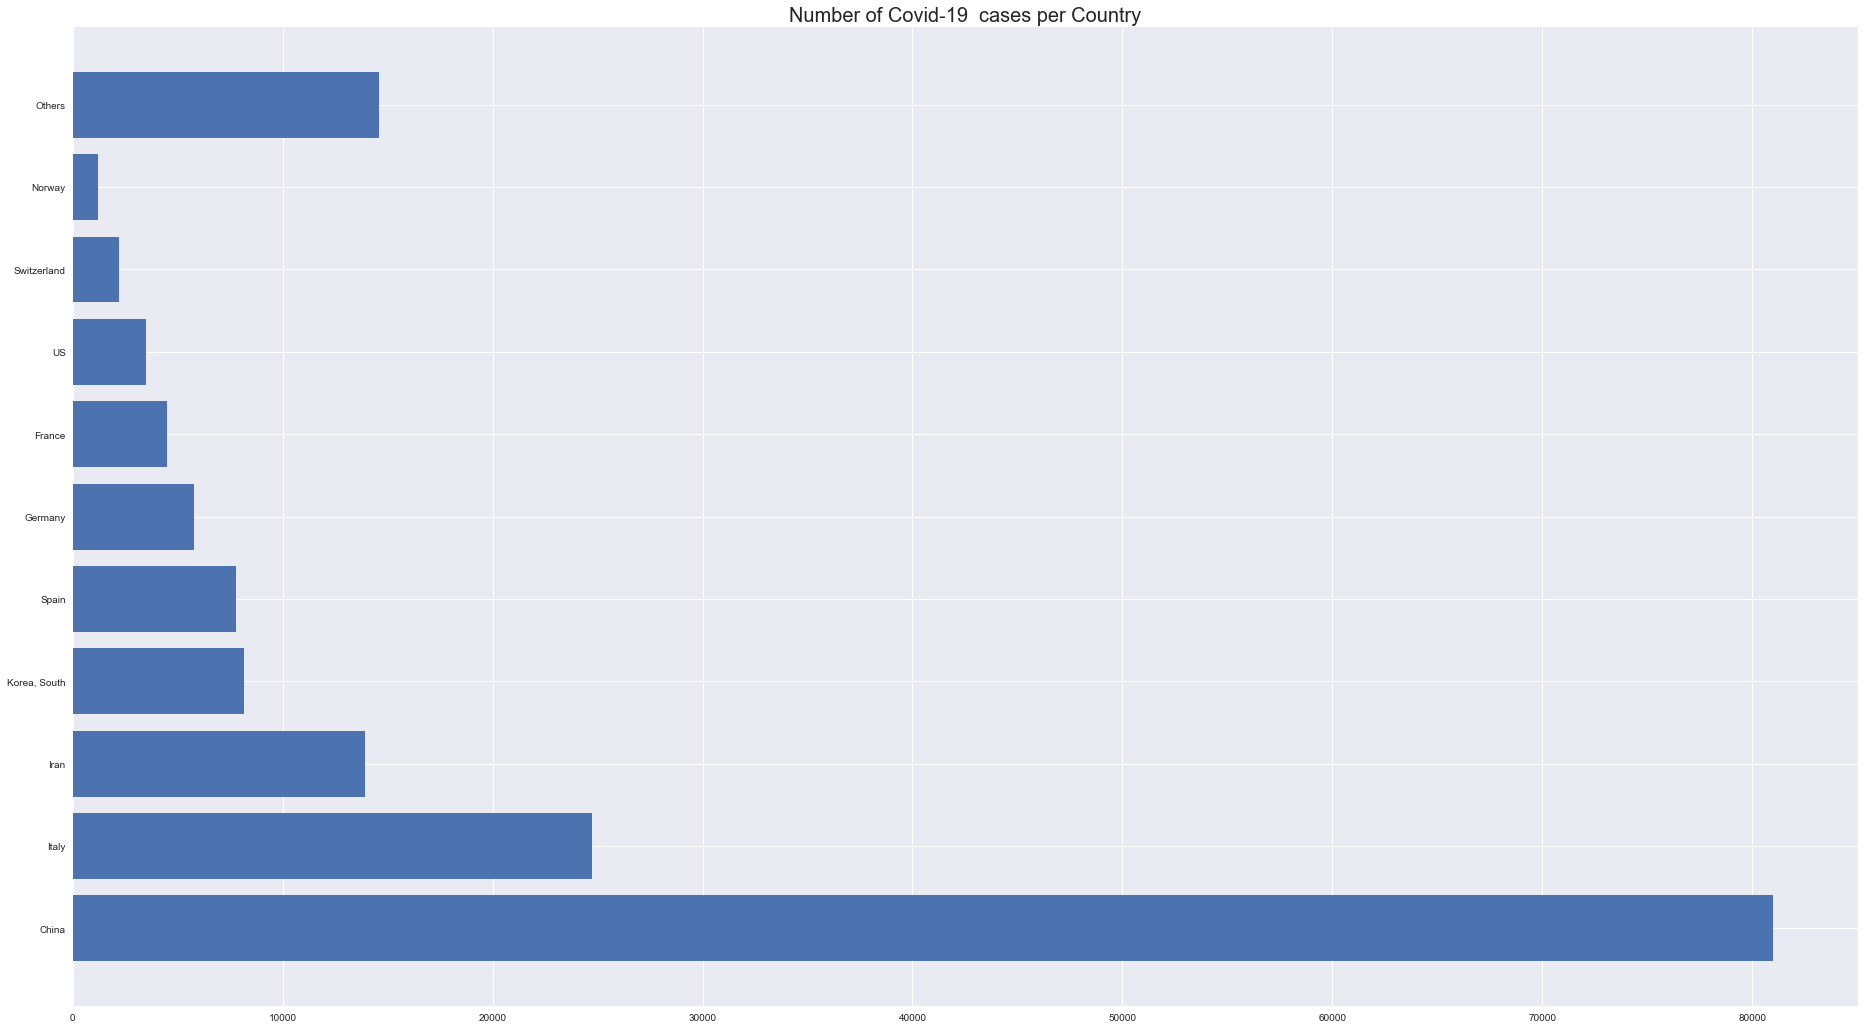

In [42]:
#visualize ^

plt.figure(figsize=(32,18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('Number of Covid-19  cases per Country' , size =20)
plt.show()

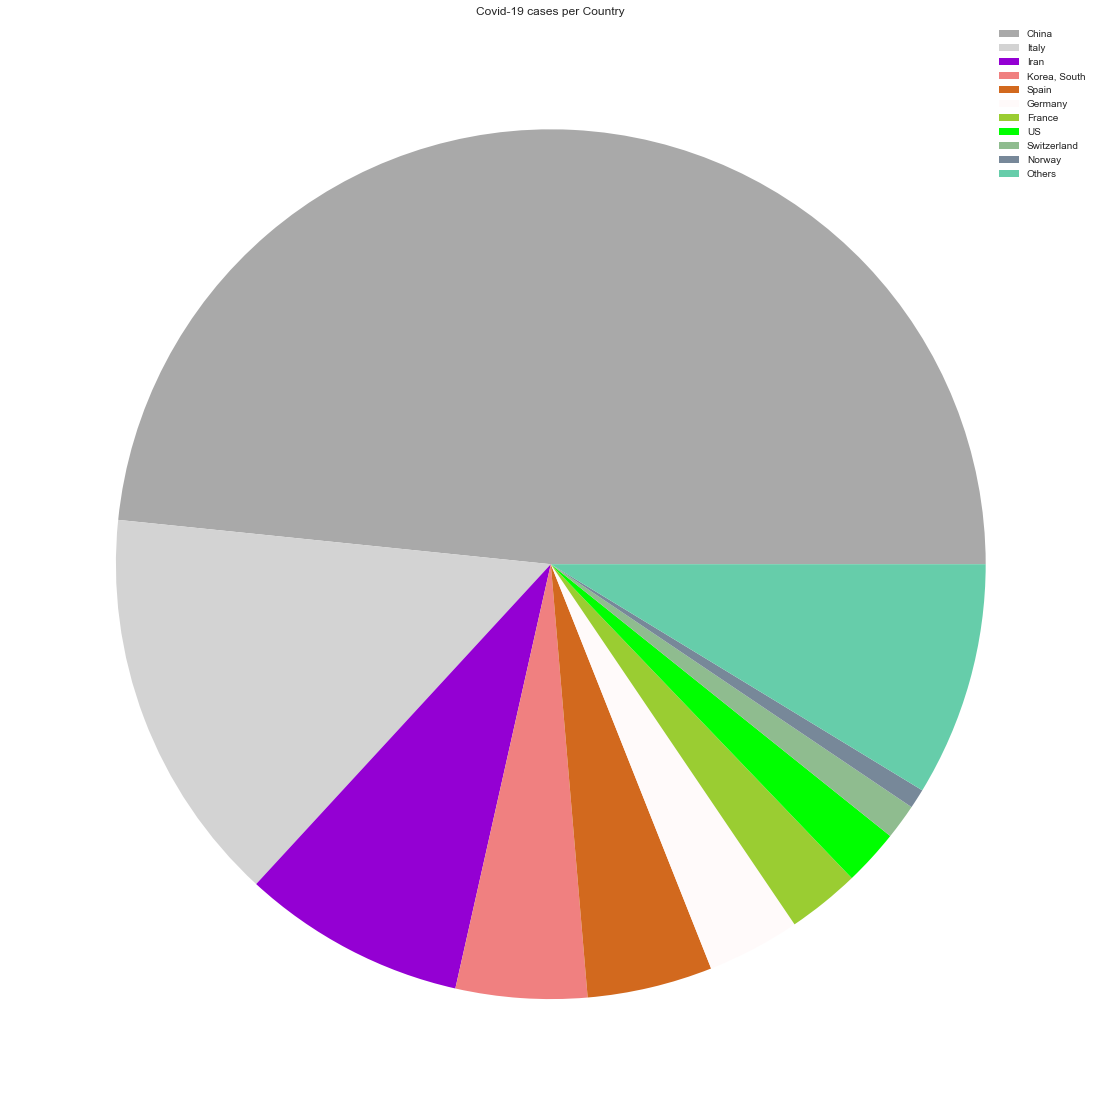

In [43]:
#piechart of the 10 country confirmed cases

c = random.choices(list(mcolors.CSS4_COLORS.values()), k =len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 cases per Country')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

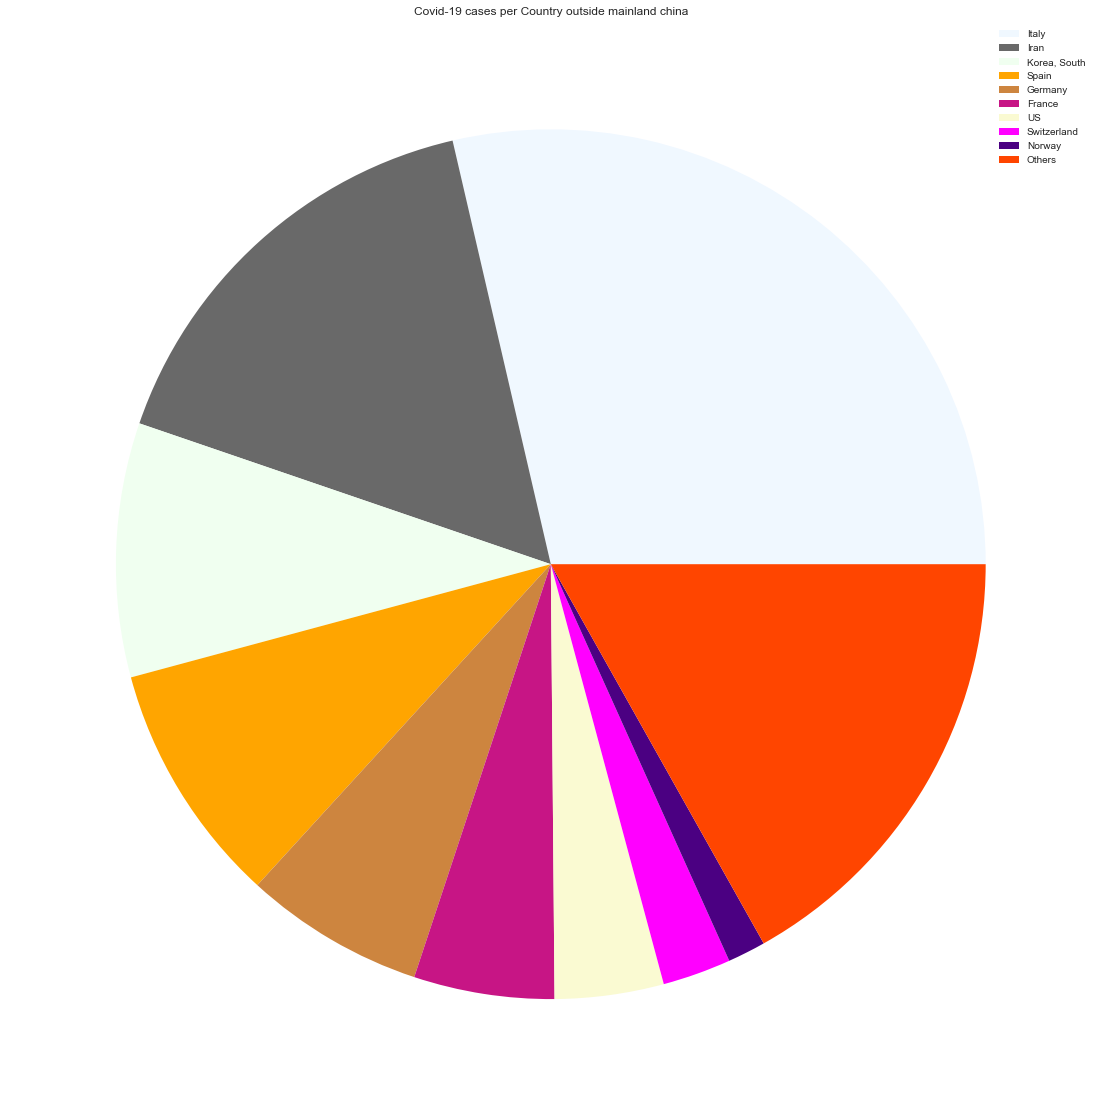

In [44]:
#piechart of the confirmed cases outside of china

c = random.choices(list(mcolors.CSS4_COLORS.values()), k =len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 cases per Country outside mainland china')
plt.pie(visual_confirmed_cases[1:], colors=c)
plt.legend(visual_unique_countries[1:], loc='best')
plt.show()

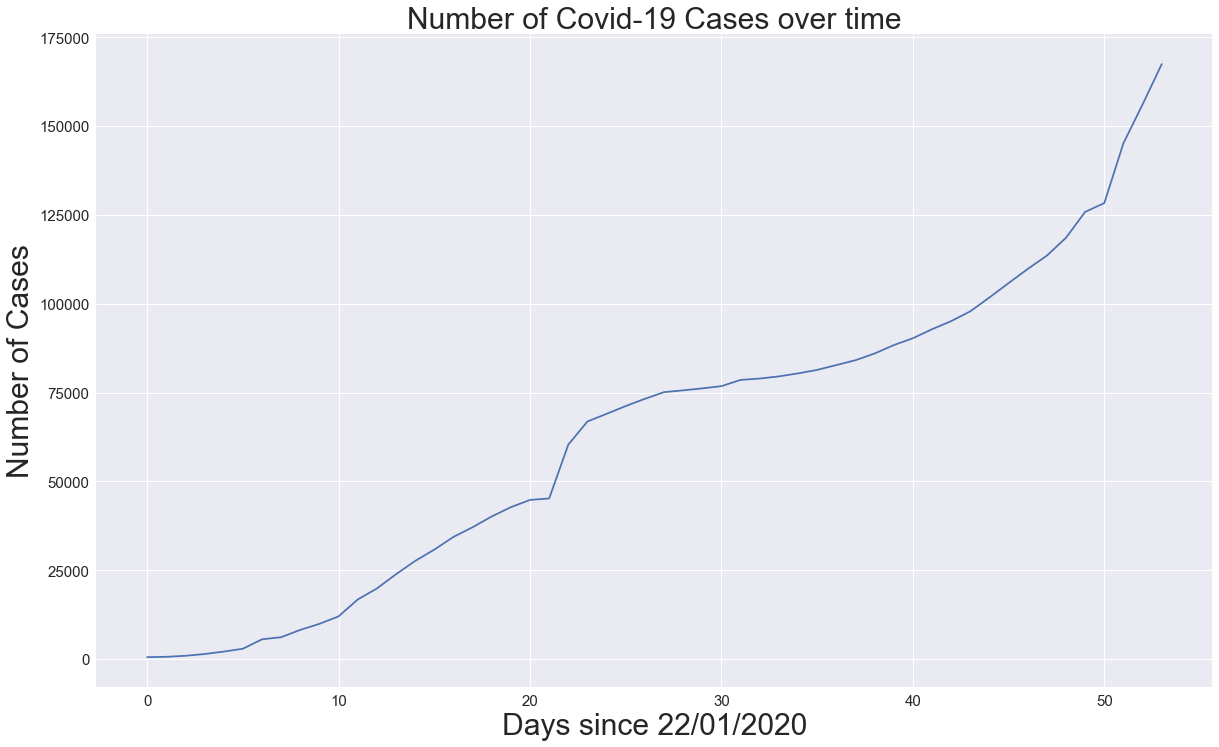

In [45]:
#Total Cases
plt.figure(figsize=(20,12))
plt.plot(world_cases)
plt.title('Number of Covid-19 Cases over time', size=30)
plt.xlabel('Days since 22/01/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

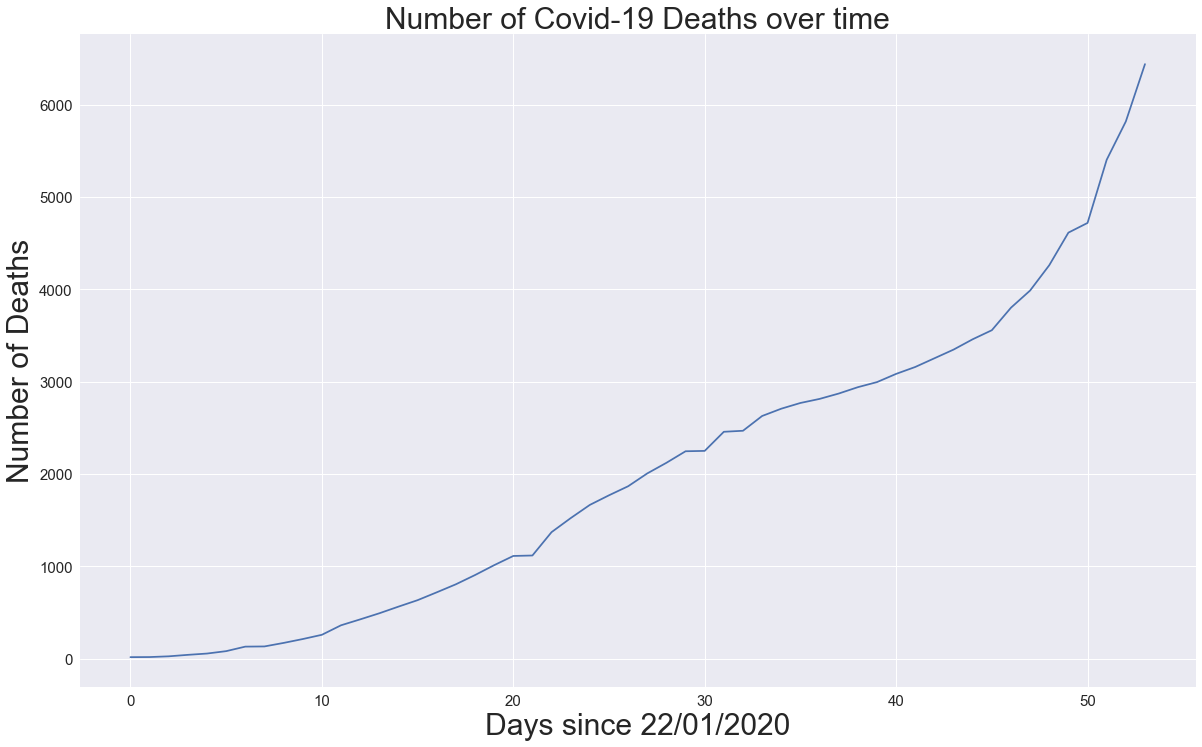

In [46]:
#Total deaths
plt.figure(figsize=(20,12))
plt.plot(total_deaths)
plt.title('Number of Covid-19 Deaths over time', size=30)
plt.xlabel('Days since 22/01/2020', size=30)
plt.ylabel('Number of Deaths', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

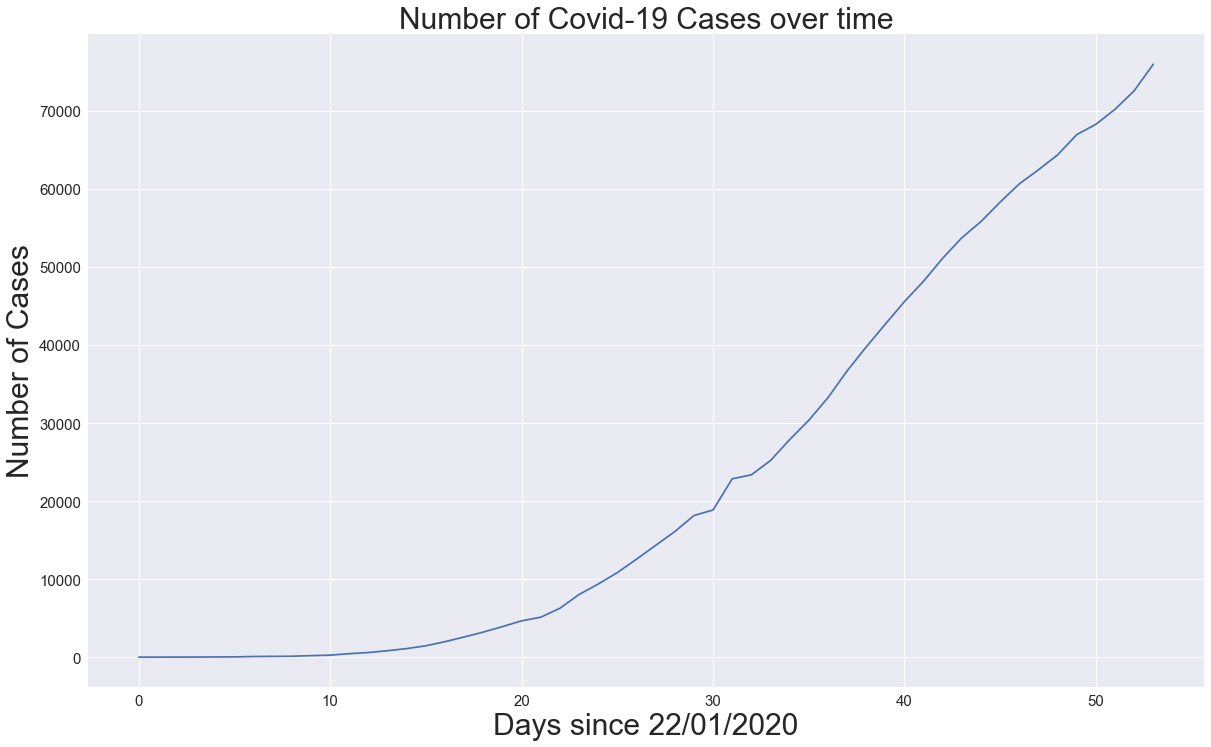

In [47]:
#Total Cases Recovered
plt.figure(figsize=(20,12))
plt.plot(total_recovered)
plt.title('Number of Covid-19 Cases over time', size=30)
plt.xlabel('Days since 22/01/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

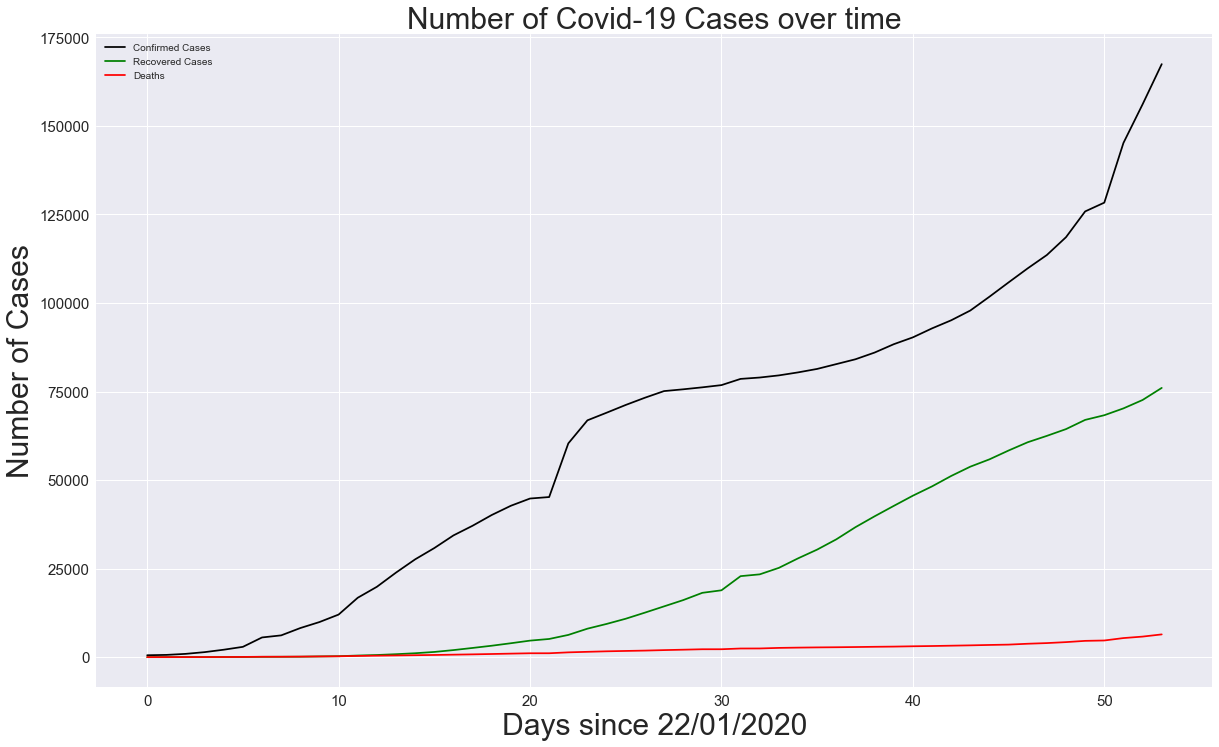

In [48]:
#Total Cases,Deaths, Recovered Cases
plt.figure(figsize=(20,12))
plt.plot(world_cases, color='black')
plt.plot(total_recovered, color='green')
plt.plot(total_deaths, color='red')
plt.legend(['Confirmed Cases', 'Recovered Cases', 'Deaths'])
plt.title('Number of Covid-19 Cases over time', size=30)
plt.xlabel('Days since 22/01/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [49]:
#World Cases Prediction



In [83]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)

In [84]:
# SVM Model

kernel = ['poly', 'sigmoid', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)


Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  97 out of 120 | elapsed:    1.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   10.2s finished
C:\Users\ciara\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [85]:
svm_search.best_params_

{'shrinking': False, 'kernel': 'poly', 'gamma': 0.01, 'epsilon': 1, 'C': 10}

In [86]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(prediction_forecast)

In [87]:
svm_confirmed

SVR(C=10, epsilon=1, gamma=0.01, kernel='poly', shrinking=False)

In [88]:
svm_pred

array([ 30388.34430898,  30389.32176407,  30396.16394972,  30414.73559647,
        30450.90143487,  30510.52619549,  30599.47460886,  30723.61140555,
        30888.80131611,  31100.90907109,  31365.79940103,  31689.3370365 ,
        32077.38670805,  32535.81314622,  33070.48108157,  33687.25524466,
        34392.00036603,  35190.58117623,  36088.86240583,  37092.70878537,
        38207.9850454 ,  39440.55591648,  40796.28612915,  42281.04041398,
        43900.68350151,  45661.0801223 ,  47568.09500689,  49627.59288584,
        51845.43848971,  54227.49654904,  56779.63179439,  59507.70895631,
        62417.59276535,  65515.14795206,  68806.239247  ,  72296.73138072,
        75992.48908377,  79899.3770867 ,  84023.26012007,  88370.00291443,
        92945.47020032,  97755.52670831, 102806.03716895, 108102.86631278,
       113651.87887036, 119458.93957224, 125529.91314897, 131870.66433112,
       138487.05784922, 145384.95843383, 152570.23081551, 160048.7397248 ,
       167826.34989226, 1

MAE 16263.308868487104
MSE 284718501.44235396


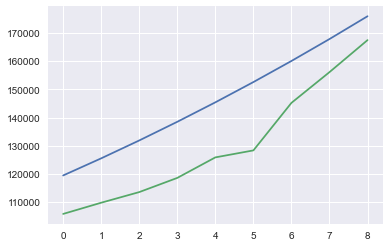

In [89]:
#check against test data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE', mean_squared_error(svm_test_pred, y_test_confirmed))

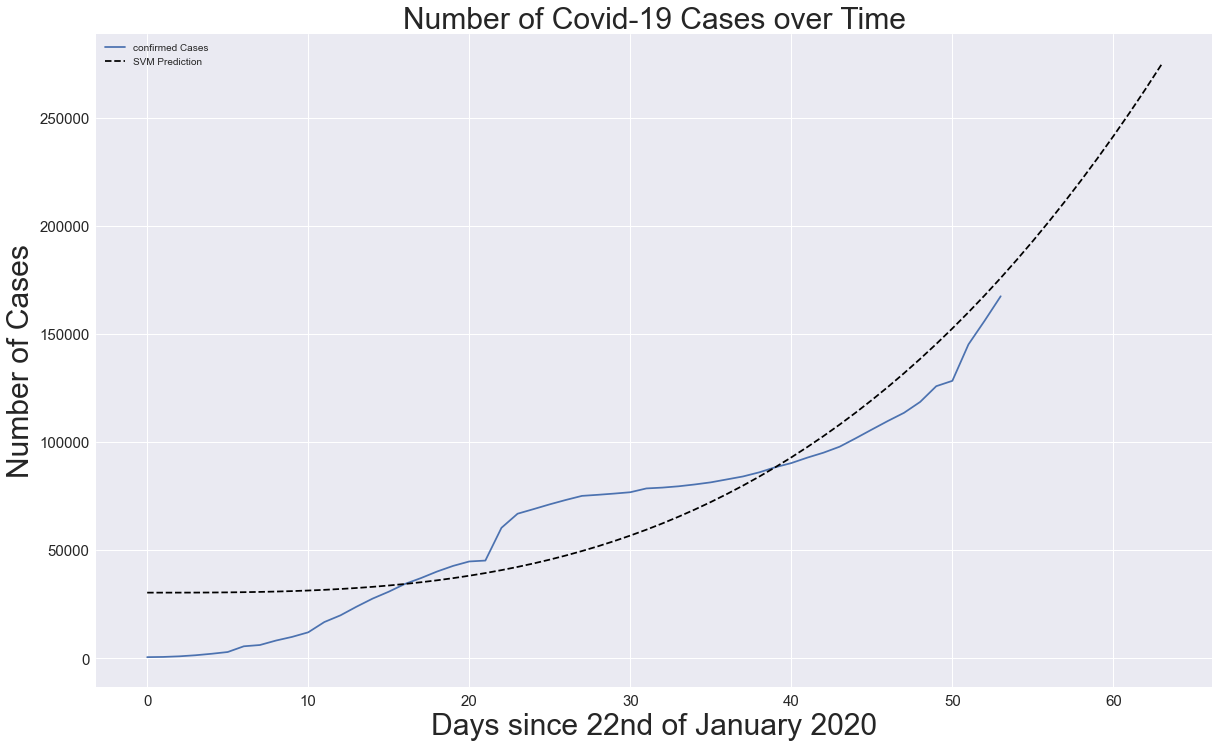

In [90]:
#Confirmed V Predict
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(prediction_forecast, svm_pred, linestyle='dashed', color='black')
plt.title('Number of Covid-19 Cases over Time', size=30)
plt.xlabel('Days since 22nd of January 2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['confirmed Cases', 'SVM Prediction'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [91]:
#SVM next 10 day prediction
print('SVM future prediction')
set(zip(prediction_forecast_dates[-10:], svm_pred[-10:]))

SVM future prediction


{('03/16/2020', 184302.3329238902),
 ('03/17/2020', 193012.43524916755),
 ('03/18/2020', 202045.0977548219),
 ('03/19/2020', 211406.18517140602),
 ('03/20/2020', 221101.56222947178),
 ('03/21/2020', 231137.09365957195),
 ('03/22/2020', 241518.64419225854),
 ('03/23/2020', 252252.0785580839),
 ('03/24/2020', 263343.2614876004),
 ('03/25/2020', 274798.0577113601)}

In [92]:
# Linear Regression Model for Predictions
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(prediction_forecast)
print('MAE', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE', mean_squared_error(test_linear_pred, y_test_confirmed))

MAE 11965.537037037033
MSE 307996364.0108404


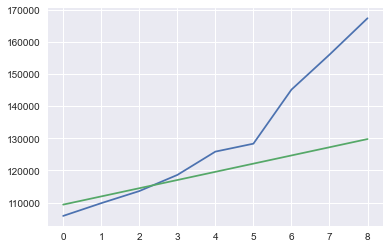

In [93]:
plt.plot(y_test_confirmed,)
plt.plot(test_linear_pred,)

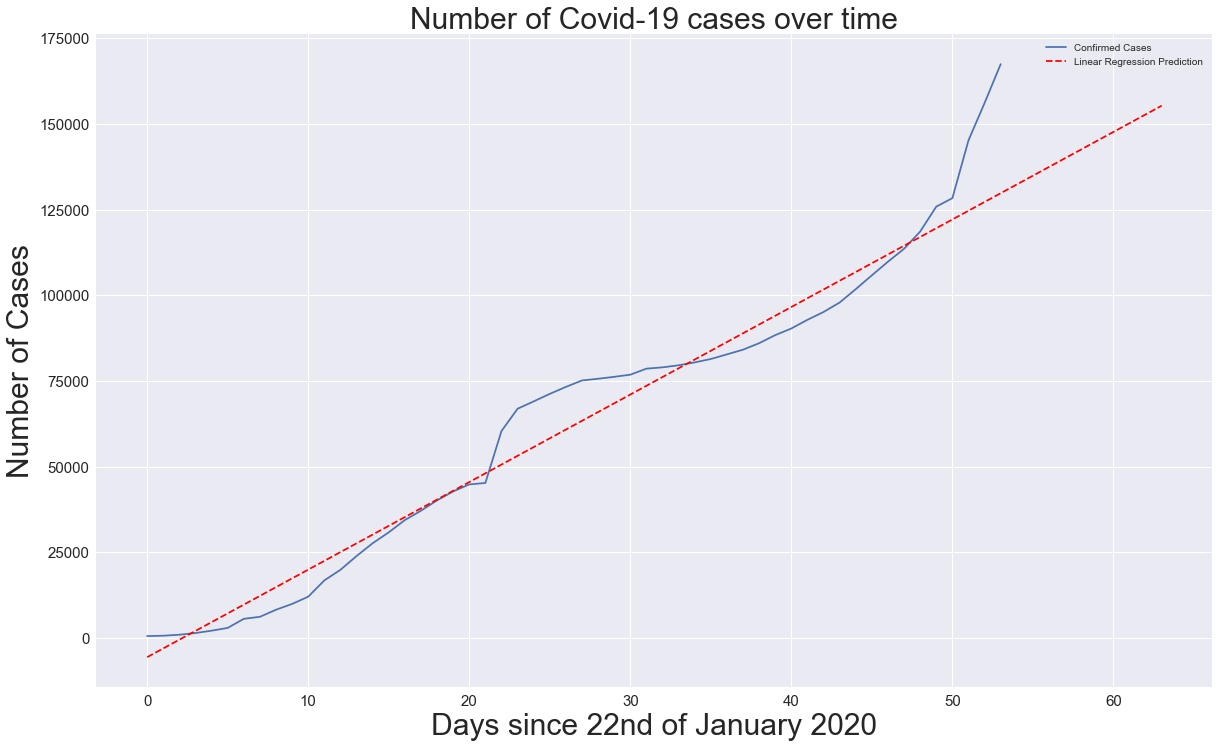

In [94]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(prediction_forecast, linear_pred, linestyle='dashed', color='red')

plt.title('Number of Covid-19 cases over time', size=30)
plt.xlabel('Days since 22nd of January 2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Prediction'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [95]:
#linear regression Predictions for the next 10 days
print('Linear Regression future Predictions:')
print(linear_pred[-10:])

Linear Regression future Predictions:
[[132336.25252525]
 [134890.72222222]
 [137445.19191919]
 [139999.66161616]
 [142554.13131313]
 [145108.6010101 ]
 [147663.07070707]
 [150217.54040404]
 [152772.01010101]
 [155326.47979798]]


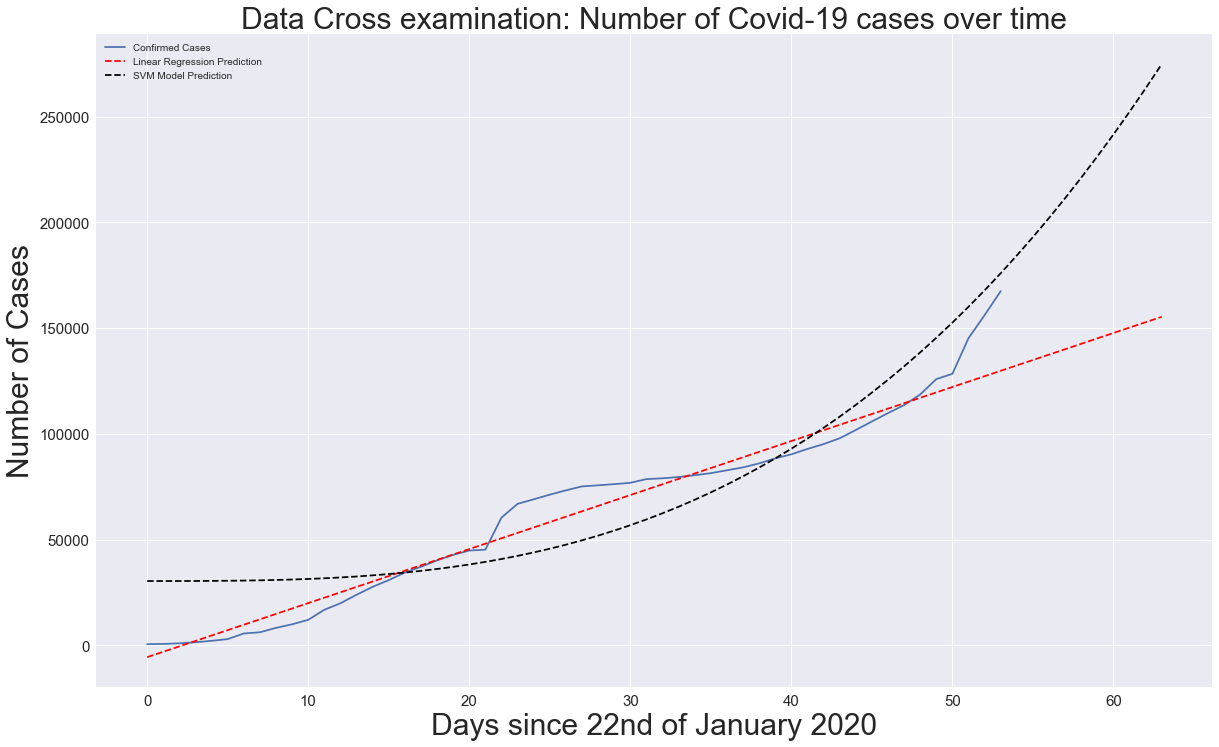

In [96]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, world_cases)
plt.plot(prediction_forecast, linear_pred, linestyle='dashed', color='red')
plt.plot(prediction_forecast, svm_pred, linestyle='dashed', color='black')
plt.title('Data Cross examination: Number of Covid-19 cases over time', size=30)
plt.xlabel('Days since 22nd of January 2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Prediction', 'SVM Model Prediction'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [64]:
#Death Cases Prediction


In [98]:
#Updating the SVM Model for death predictions
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, total_deaths, test_size=0.15, shuffle=False)
svm_search.fit(X_train_confirmed, y_train_confirmed)
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(prediction_forecast)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  97 out of 120 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   37.2s finished
C:\Users\ciara\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [99]:
#SVM next 10 day prediction of deaths
print('SVM future prediction')
set(zip(prediction_forecast_dates[-10:], svm_pred[-10:]))

SVM future prediction


{('03/16/2020', 6323.5029478476845),
 ('03/17/2020', 6641.868975937685),
 ('03/18/2020', 6972.02501516781),
 ('03/19/2020', 7314.185429376984),
 ('03/20/2020', 7668.564582404109),
 ('03/21/2020', 8035.376838088095),
 ('03/22/2020', 8414.836560267859),
 ('03/23/2020', 8807.158112782316),
 ('03/24/2020', 9212.555859470365),
 ('03/25/2020', 9631.244164170927)}

MAE 317.5894367618703
MSE 121046.21484150045


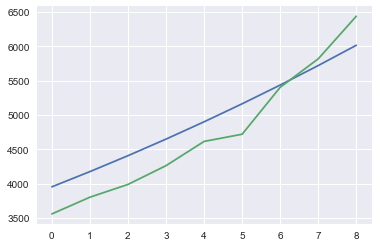

In [100]:
#check against test data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE', mean_squared_error(svm_test_pred, y_test_confirmed))

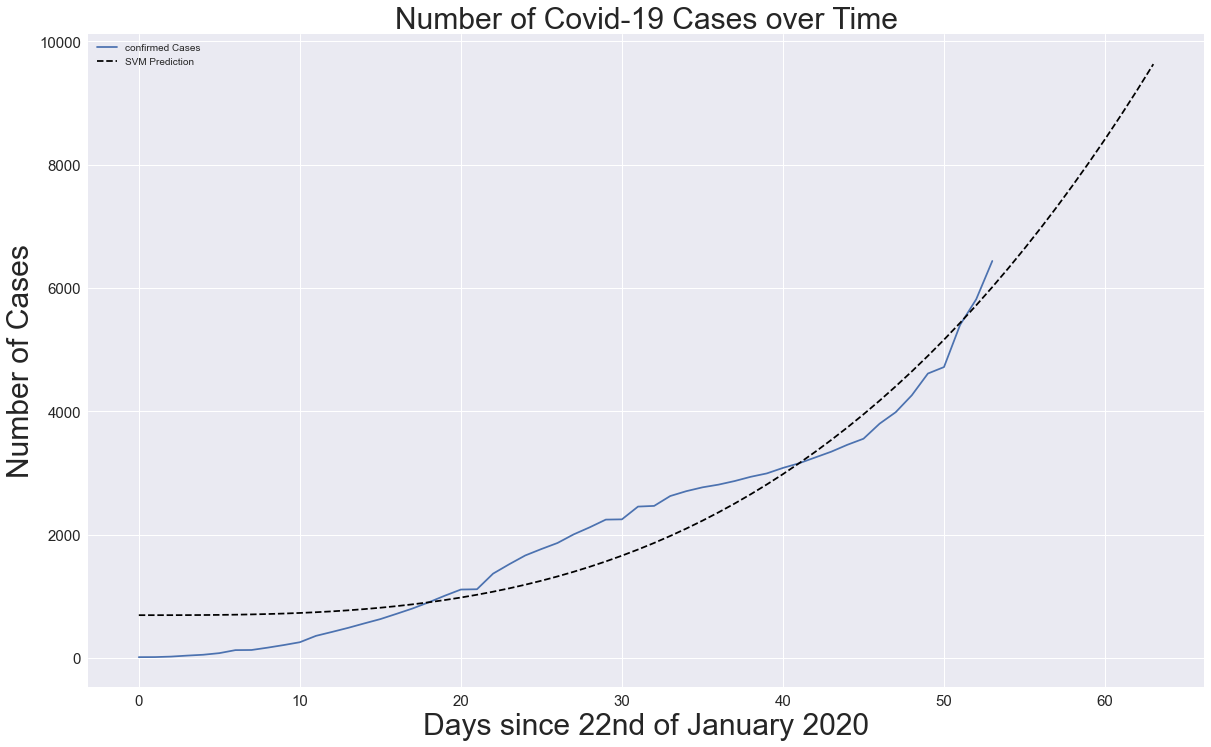

In [101]:
#Confirmed V Predicted deaths using svm
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_deaths)
plt.plot(prediction_forecast, svm_pred, linestyle='dashed', color='black')
plt.title('Number of Covid-19 Cases over Time', size=30)
plt.xlabel('Days since 22nd of January 2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['confirmed Cases', 'SVM Prediction'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [105]:
#Updating the linear regression model for deaths
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(prediction_forecast)
print('MAE', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE', mean_squared_error(test_linear_pred, y_test_confirmed))

MAE 863.0823451910401
MSE 1230311.8294333695


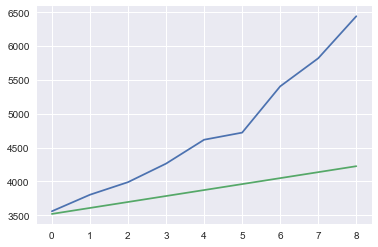

In [106]:
plt.plot(y_test_confirmed,)
plt.plot(test_linear_pred,)

In [107]:
#linear regression Predictions for the next 10 days
print('Linear Regression future Predictions:')
print(linear_pred[-10:])

Linear Regression future Predictions:
[[4311.92709706]
 [4400.08454106]
 [4488.24198507]
 [4576.39942907]
 [4664.55687308]
 [4752.71431708]
 [4840.87176109]
 [4929.02920509]
 [5017.1866491 ]
 [5105.3440931 ]]


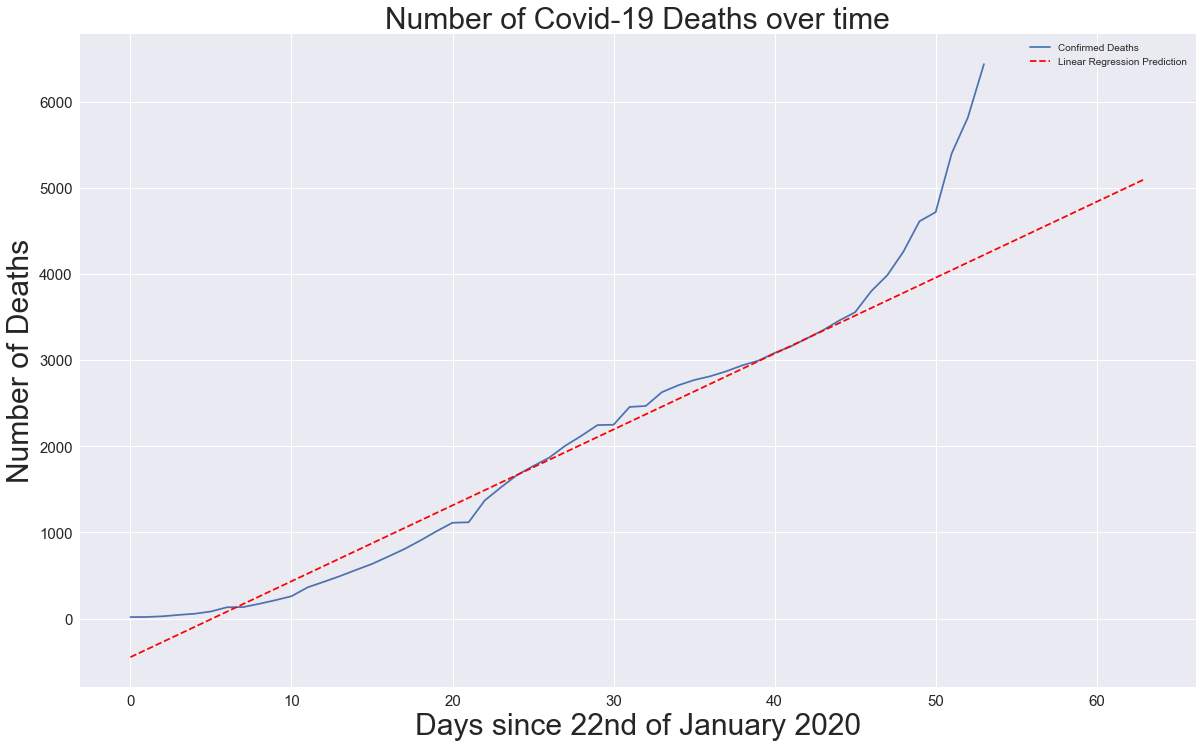

In [108]:
#Linear Regression for total deaths
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_deaths)
plt.plot(prediction_forecast, linear_pred, linestyle='dashed', color='red')

plt.title('Number of Covid-19 Deaths over time', size=30)
plt.xlabel('Days since 22nd of January 2020', size=30)
plt.ylabel('Number of Deaths', size=30)
plt.legend(['Confirmed Deaths', 'Linear Regression Prediction'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


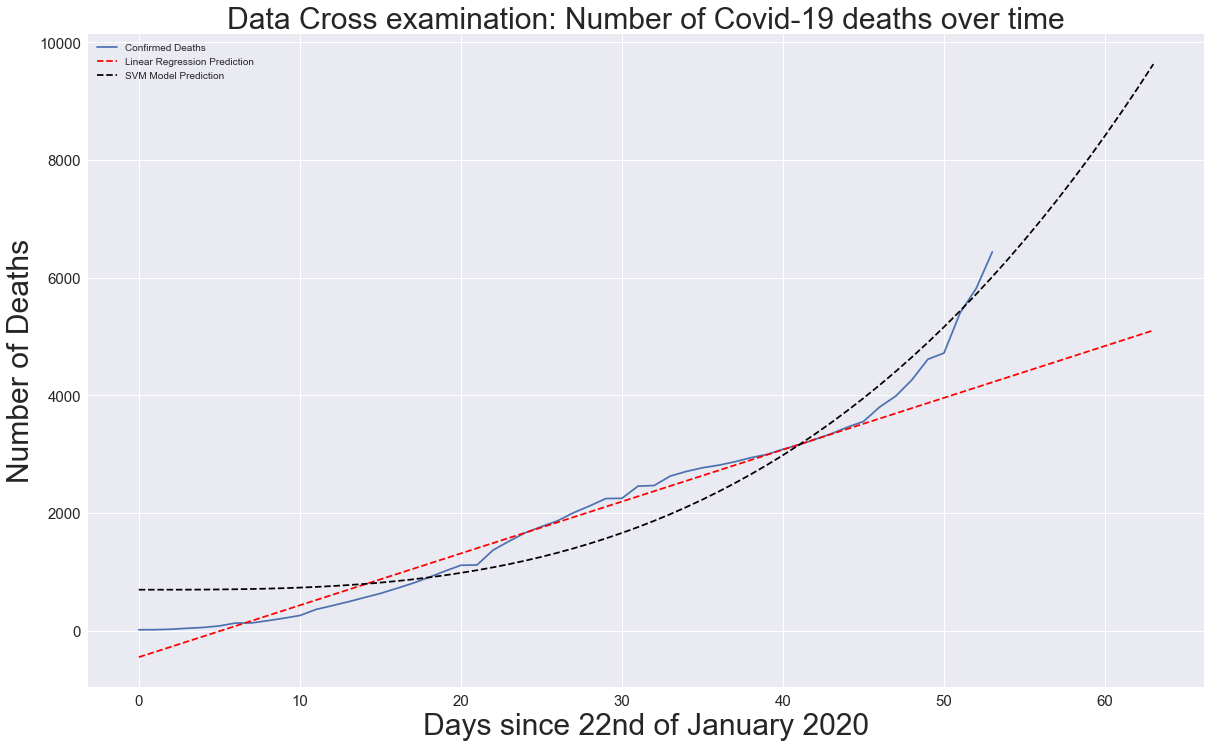

In [109]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_deaths)
plt.plot(prediction_forecast, linear_pred, linestyle='dashed', color='red')
plt.plot(prediction_forecast, svm_pred, linestyle='dashed', color='black')
plt.title('Data Cross examination: Number of Covid-19 deaths over time', size=30)
plt.xlabel('Days since 22nd of January 2020', size=30)
plt.ylabel('Number of Deaths', size=30)
plt.legend(['Confirmed Deaths', 'Linear Regression Prediction', 'SVM Model Prediction'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [110]:
#Recovered cases Prediction

In [133]:
#Updating the SVM Model for Recovered cases predictions
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, total_recovered, test_size=0.15, shuffle=False)
svm_search.fit(X_train_confirmed, y_train_confirmed)
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(prediction_forecast)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  97 out of 120 | elapsed:    1.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   30.8s finished
C:\Users\ciara\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [134]:
#SVM next 10 day prediction of recovered cases
print('SVM future prediction')
set(zip(prediction_forecast_dates[-10:], svm_pred[-10:]))

SVM future prediction


{('03/16/2020', 112389.18425440212),
 ('03/17/2020', 118766.38545076159),
 ('03/18/2020', 125379.75277829339),
 ('03/19/2020', 132233.58016665262),
 ('03/20/2020', 139332.16154548322),
 ('03/21/2020', 146679.79084446264),
 ('03/22/2020', 154280.76199321804),
 ('03/23/2020', 162139.36892144737),
 ('03/24/2020', 170259.90555874613),
 ('03/25/2020', 178646.66583487001)}

MAE 17909.391212713315
MSE 383642126.45320237


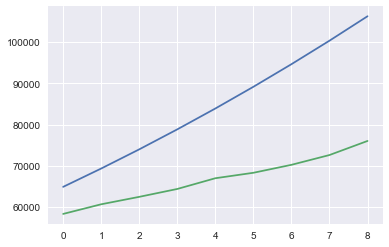

In [135]:
#check against test data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE', mean_squared_error(svm_test_pred, y_test_confirmed))

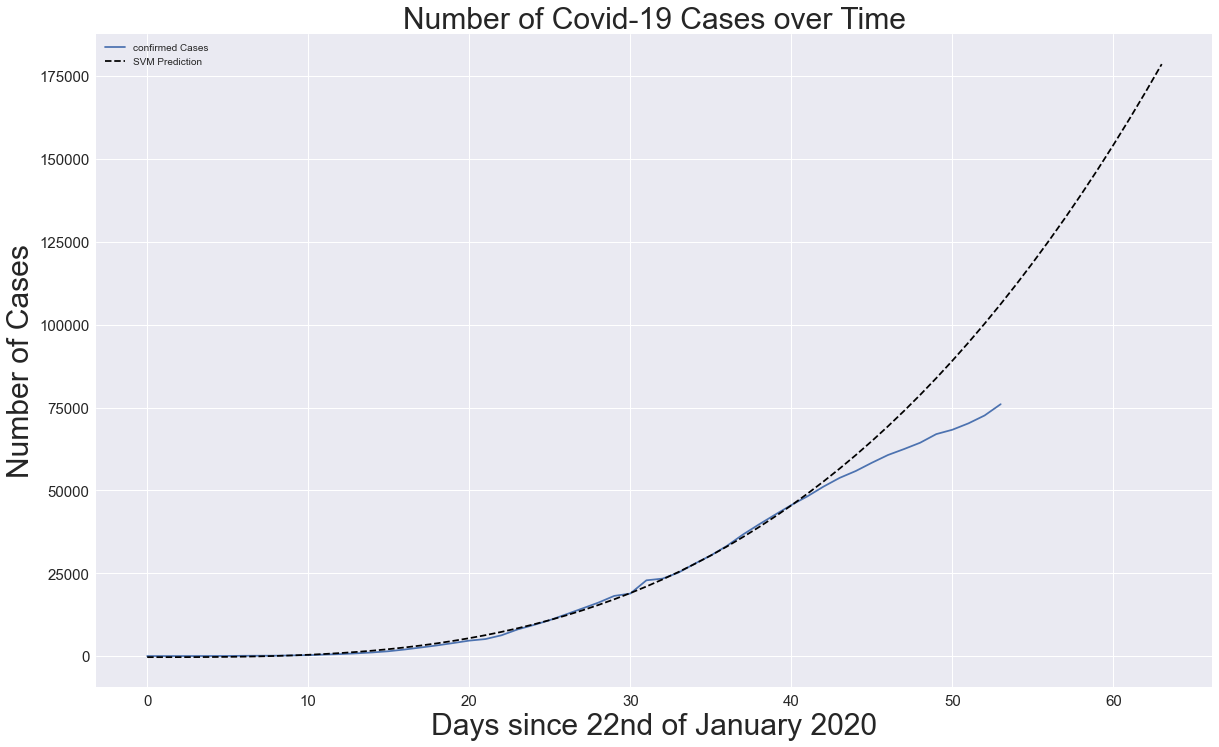

In [136]:
#Confirmed V Predicted deaths using svm
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_recovered)
plt.plot(prediction_forecast, svm_pred, linestyle='dashed', color='black')
plt.title('Number of Covid-19 Cases over Time', size=30)
plt.xlabel('Days since 22nd of January 2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['confirmed Cases', 'SVM Prediction'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [137]:
#Updating the linear regression model for recovered cases
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(prediction_forecast)
print('MAE', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE', mean_squared_error(test_linear_pred, y_test_confirmed))

MAE 18220.28067632848
MSE 337147862.9268495


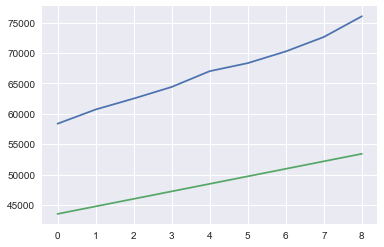

In [138]:
plt.plot(y_test_confirmed,)
plt.plot(test_linear_pred,)

In [139]:
print('Linear Regression future Predictions:')
print(linear_pred[-10:])

Linear Regression future Predictions:
[[54648.13236715]
 [55884.34830918]
 [57120.56425121]
 [58356.78019324]
 [59592.99613527]
 [60829.21207729]
 [62065.42801932]
 [63301.64396135]
 [64537.85990338]
 [65774.07584541]]


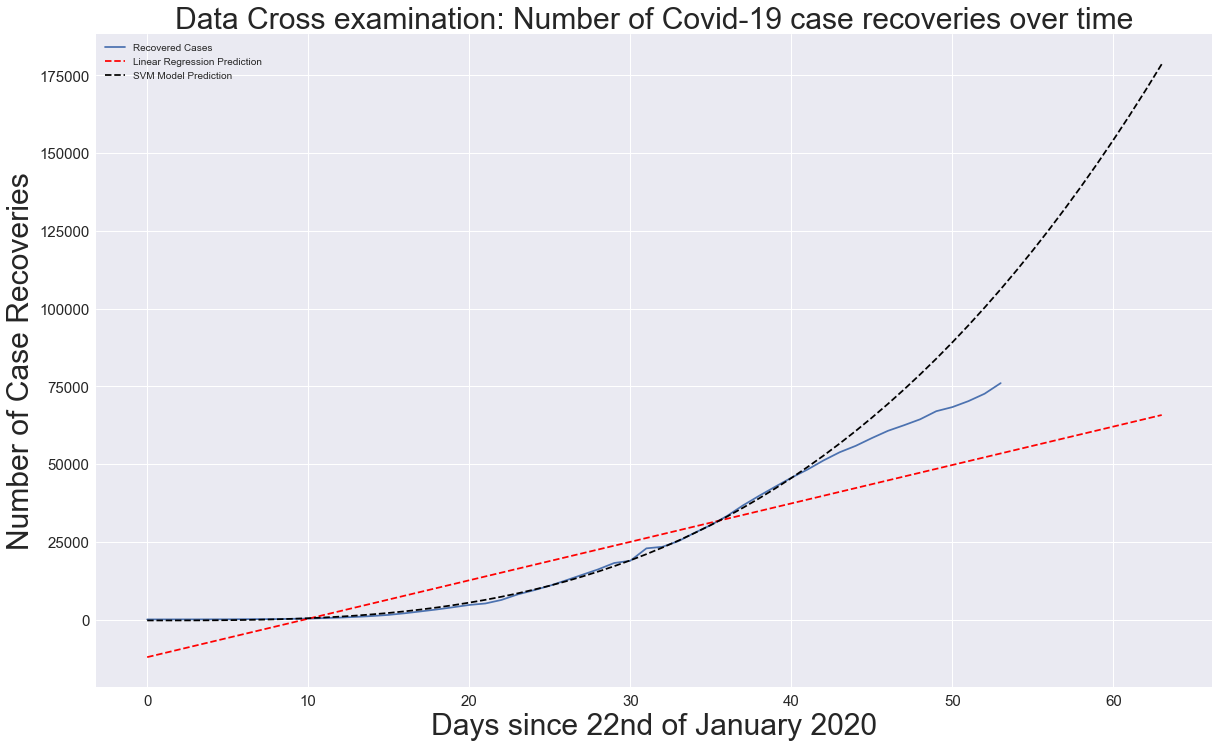

In [123]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates, total_recovered)
plt.plot(prediction_forecast, linear_pred, linestyle='dashed', color='red')
plt.plot(prediction_forecast, svm_pred, linestyle='dashed', color='black')
plt.title('Data Cross examination: Number of Covid-19 case recoveries over time', size=30)
plt.xlabel('Days since 22nd of January 2020', size=30)
plt.ylabel('Number of Case Recoveries', size=30)
plt.legend(['Recovered Cases', 'Linear Regression Prediction', 'SVM Model Prediction'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()